In [22]:
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,6)
plt.rcParams["figure.titlesize"] = 11 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 11 # control title size
plt.rcParams["axes.labelsize"] = 11 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 11 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 11 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_86746/700935474.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(frequency[np.where(errorsignal_slowmodulation(frequency,r=0.9)+2 < 0)[0][-1]],0, 'r*', color='crimson', markersize=7.5, label='Actual Lockpoint')


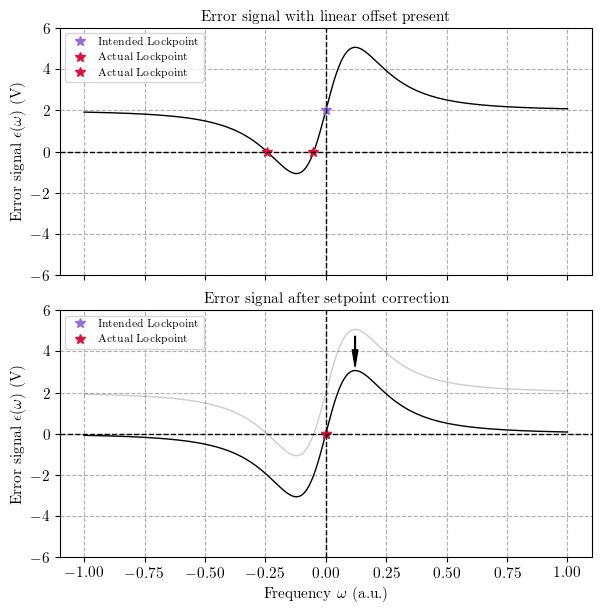

In [93]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1, sharex=True, sharey=True, constrained_layout=True)

ax1 = axs[0]
ax2 = axs[1]

def errorsignal_slowmodulation(frequency,r):
    return (2*r**2*np.sin(frequency)*(r**2-1)**2)/(1-2*r**2*np.cos(frequency)+r**4)**2

frequency = np.linspace(-1, 1, 1000)

ax1.plot(frequency,errorsignal_slowmodulation(frequency,r=0.9)+2, color='black')
ax1.plot(frequency[500],2, '*', color='mediumpurple', markersize=7.5, label='Intended Lockpoint')
ax1.plot(frequency[np.where(errorsignal_slowmodulation(frequency,r=0.9)+2 < 0)[0][0]],0, '*', color='crimson', markersize=7.5, label='Actual Lockpoint')
ax1.plot(frequency[np.where(errorsignal_slowmodulation(frequency,r=0.9)+2 < 0)[0][-1]],0, 'r*', color='crimson', markersize=7.5, label='Actual Lockpoint')
ax1.axvline(x=0, color='black', linestyle='--')
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_ylim(-6,6)
# plt.axvline(x=0, color='black', linestyle='--')
# plt.axhline(y=0, color='black', linestyle='--')

ax2.plot(frequency,errorsignal_slowmodulation(frequency,r=0.9)+2, color='black',alpha=0.2)
# ax2.plot(frequency[500],2, '*', color='mediumpurple', markersize=7.5,alpha=0.25)
# ax2.plot(frequency[np.where(errorsignal_slowmodulation(frequency,r=0.9)+2 < 0)[0][0]],0, '*', color='crimson', markersize=7.5,alpha=0.25)
# ax2.plot(frequency[np.where(errorsignal_slowmodulation(frequency,r=0.9)+2 < 0)[0][-1]],0, 'r*', color='crimson', markersize=7.5,alpha=0.25)


ax2.plot(frequency,errorsignal_slowmodulation(frequency,r=0.9), color='black')
ax2.plot(frequency[500],0, '*', color='mediumpurple', markersize=7.5, label='Intended Lockpoint')
ax2.plot(frequency[500],0, '*', color='crimson', markersize=7.5, label='Actual Lockpoint')
ax2.axvline(x=0, color='black', linestyle='--')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_ylim(-6,6)

ax2.annotate(
    '', 
    xy=(frequency[560], 3.25), 
    xytext=(frequency[560], 4.75), 
    arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=4)
)

ax2.set_xlabel(r'Frequency $\omega$ (a.u.)')
ax1.set_ylabel(r'Error signal $\epsilon(\omega)$ (V)')
ax2.set_ylabel(r'Error signal $\epsilon(\omega)$ (V)')
# plt.legend()
ax1.set_title(r'Error signal with linear offset present')
ax2.set_title(r'Error signal after setpoint correction')
ax1.legend()
ax2.legend()
### plot an inset that zooms in on the error signal for r=0.9 close to x=0 and y=0 i.e. resonance
# axins = plt.axes([0.65, 0.65, 0.2, 0.2]) # inset axes
# axins.plot(frequency,errorsignal_slowmodulation(frequency,r=0.9))
# axins.axvline(x=0, color='black', linestyle='--')
# axins.axhline(y=0, color='black', linestyle='--')
# axins.set_xlim(-0.25,0.25)
# axins.set_ylim(-3.5,3.5)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# plt.grid(visible=False)
# plt.draw()

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it

plt.savefig('250525 SetpointCorrectionErrorSignal.pdf', dpi=300)

# might wanna change the axis to units of gamma linewidth finesse blablabla you know the drill

In [79]:
np.argmax(errorsignal_slowmodulation(frequency,r=0.9)+2)

560